# Author: ***Navaneeth G***

## ***Task 1***

##Linear Regression

### *Importing all libraries*

In [28]:
#importing Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
sns.set()
%matplotlib inline
print("Importing Libaries setup Complete")

Importing Libaries setup Complete


### *Importing the requried Dataset*

In [29]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data=pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [30]:
data.describe() 

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### *Exploring the Dataset*

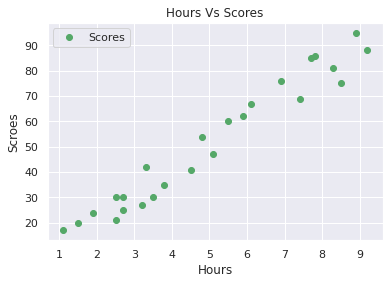

In [31]:
data.plot(x='Hours', y='Scores', style='go')
plt.xlabel("Hours")
plt.ylabel("Scroes")
plt.title("Hours Vs Scores")
plt.show()

### *preparing the data*

In [32]:
a=data.iloc[:,:-1].values
b=data.iloc[:, 1].values

In [33]:
train_X, val_x, train_y, val_y = train_test_split(a,b,test_size=0.2,random_state=6)

### *Training*

In [34]:
regressor = LinearRegression()
regressor.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### *Regression*

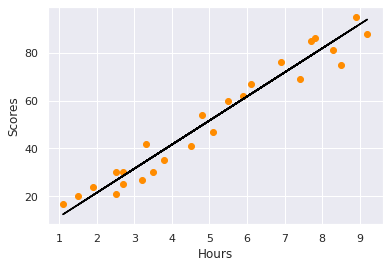

In [35]:
line = regressor.coef_*a+regressor.intercept_
plt.scatter(a, b,color='darkorange')
plt.plot(a, line,color='black');
plt.xlabel("Hours")
plt.ylabel('Scores')
plt.show()

In [36]:
y = data ['Scores']
x1 = data ['Hours']
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           9.13e-17
Time:                        06:12:07   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

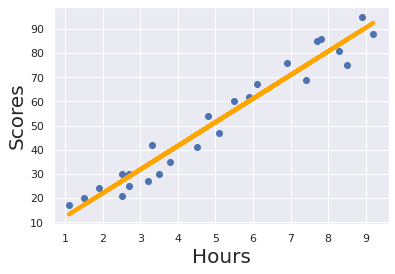

In [37]:
plt.scatter(x1,y)
yhat = 9.7758*x1 + 2.4837
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('Hours', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.show()

### *Predictions*

In [38]:
print(val_x)
y_pred = regressor.predict(val_x)

[[3.8]
 [5.5]
 [1.5]
 [9.2]
 [8.3]]


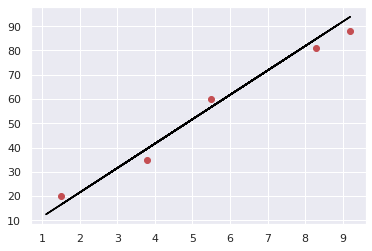

In [39]:
plt.scatter(val_x,val_y,c="r")
plt.plot(a, line,color='black')
plt.show()

In [40]:
df = pd.DataFrame({'Actual': val_y, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,35,39.594215
1,60,56.684534
2,20,16.472019
3,88,93.881110
4,81,84.833294


In [41]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 94.38376623376621


### *Evaluating*

In [42]:
print('Mean Absolute Error:',metrics.mean_absolute_error(val_y, y_pred))
print('Median Absolute Error',metrics.median_absolute_error(val_y, y_pred))
print('Max Error:',metrics.max_error(val_y, y_pred))
print('Accuracy:',metrics.r2_score(val_y, y_pred))

Mean Absolute Error: 4.2304132231404825
Median Absolute Error 3.8332939787485003
Max Error: 5.881109799291579
Accuracy: 0.9723939704109645
